# 3. 신경망

이 장에서는 신경망의 순전파에 대해서 다룬다.
다음과 같은 것들이 언급된다.
 - 신경망
 - 활성화함수 : sigmoid ,ReLU, softmax
 - numpy로 신경망 구성하여 순전파 구현하기
 - MNIST에 적용

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 3.1. 퍼셉트론에서 신경망으로

### 3.1.1. 신경망의 예

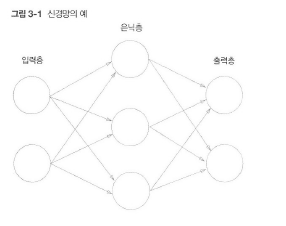
 - 입력층
 - 출력층
 - 은닉층

### 3.1.2. 퍼셉트론 복습

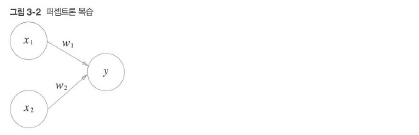

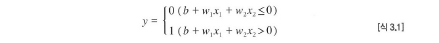

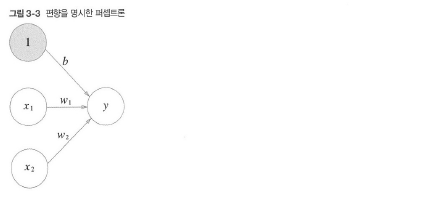

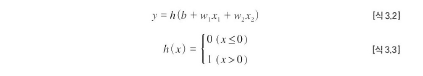

 - weight
 - bias

### 3.1.3. 활성화 함수의 등장

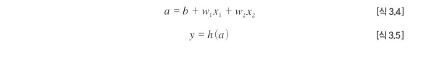

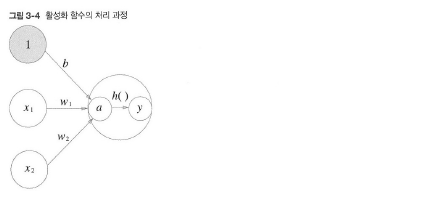

 - 활성화 함수 (activation function)
 - 뉴런(노드)

## 3.2. 활성화 함수

### 3.2.1. 시그모이드 함수

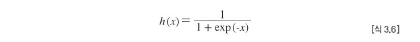

### 3.2.2. 계단 함수 구현하기

In [2]:
# step function, python
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

`x`에 `int`, `float`가 들어갈 수 있다.
 `np.array`를 넣으면 오류가 난다.

In [3]:
print(step_function(2))
print(step_function(2.0))
# print(step_function(np.array([2,3]))) # error

1
1


In [4]:
# step function, python
def step_function(x):
    y = x > 0
    return y.astype(np.int64)

한용님의 조언 `astype(np.int) -> astype(np.int64) or astype(int)`을 따랐다.

반대로, `int`, `float`가 들어갈 수 없다.
`np.array`는 잘 작동한다.
if 문을 넣으면 둘 모두 작용될 수 있게 할 수 있겠지만, 굳이 그렇게까지 하고 있지는 않다. (일종의 method overloading)

In [5]:
# print(step_function(2))
# print(step_function(2.0))
print(step_function(np.array([2,3]))) # error

[1 1]


### 3.2.3. 계단함수의 그래프

(-0.1, 1.1)

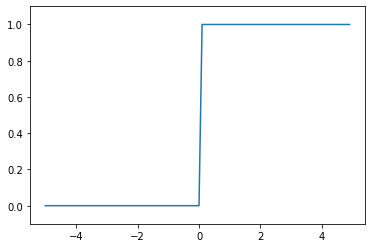

In [6]:
x = np.arange(-5,5,0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)

당연히, 이것은 엄밀한 의미의 step function graph가 아니다.
유한개의 점들만 찍어서 이었다는 점은 차치하더라도, 저 중간의 올라가는 모양이 없어야 한다.

### 3.2.4. 시그모이드 함수 구현하기

 - NumPy의 broadcasting

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
for x in np.arange(-3,3,0.1):
    print("x : {0:.1f}, sigmoid : {1:5.4f}".format(x,sigmoid(x)))
#    print("x = {0} : sigmoid = {1}")
#    print(sigmoid(x))

x : -3.0, sigmoid : 0.0474
x : -2.9, sigmoid : 0.0522
x : -2.8, sigmoid : 0.0573
x : -2.7, sigmoid : 0.0630
x : -2.6, sigmoid : 0.0691
x : -2.5, sigmoid : 0.0759
x : -2.4, sigmoid : 0.0832
x : -2.3, sigmoid : 0.0911
x : -2.2, sigmoid : 0.0998
x : -2.1, sigmoid : 0.1091
x : -2.0, sigmoid : 0.1192
x : -1.9, sigmoid : 0.1301
x : -1.8, sigmoid : 0.1419
x : -1.7, sigmoid : 0.1545
x : -1.6, sigmoid : 0.1680
x : -1.5, sigmoid : 0.1824
x : -1.4, sigmoid : 0.1978
x : -1.3, sigmoid : 0.2142
x : -1.2, sigmoid : 0.2315
x : -1.1, sigmoid : 0.2497
x : -1.0, sigmoid : 0.2689
x : -0.9, sigmoid : 0.2891
x : -0.8, sigmoid : 0.3100
x : -0.7, sigmoid : 0.3318
x : -0.6, sigmoid : 0.3543
x : -0.5, sigmoid : 0.3775
x : -0.4, sigmoid : 0.4013
x : -0.3, sigmoid : 0.4256
x : -0.2, sigmoid : 0.4502
x : -0.1, sigmoid : 0.4750
x : 0.0, sigmoid : 0.5000
x : 0.1, sigmoid : 0.5250
x : 0.2, sigmoid : 0.5498
x : 0.3, sigmoid : 0.5744
x : 0.4, sigmoid : 0.5987
x : 0.5, sigmoid : 0.6225
x : 0.6, sigmoid : 0.6457
x : 0.7,

(-0.1, 1.1)

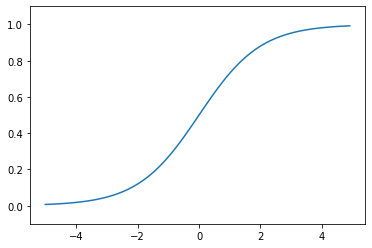

In [9]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)

### 3.2.5. 시그모이드 함수와 계단 함수 비교

차이점
 - 연속성
 - 매끄러움의 차이(미분가능성)
 - 치역의 차이 : discrete vs continuous

공통점
 - 작을 때 0, 클 때 1
 - 함숫값이 0과 1 사이의 값을 넘어서지 않는다.

### 3.2.6. 비선형 함수

 - 이 책에서는 선형함수를 $y=ax+b$인 함수로 정의하고 있다.
즉 affine function 또한 선형함수로 취급하고 있다.
 - 선형함수를 합성하더라도 여전히 선형함수이다.

### 3.2.7. ReLU 함수

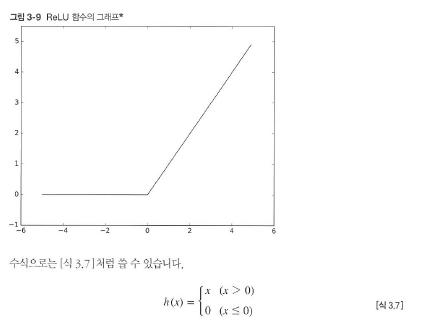

In [10]:
def relu(x):
    return np.maximum(0,x)

In [11]:
print(relu(2))
print(relu(2.0))
print(relu(np.array([2,3])))

2
2.0
[2 3]


`np.max`와 `np.maximum`은 엄밀하게는 조금 다르다.
[이곳](https://stackoverflow.com/questions/33569668/numpy-max-vs-amax-vs-maximum)
에 설명이 있다.
`np.max`는 오류가 나니, `np.maximum`을 쓰겠다.

## 3.3. 다차원 배열의 계산

### 3.3.1. 다차원 배열

 - 벡터, 행렬, 텐서
 - `ndim()`, `.shape`

### 3.3.2. 행렬의 곱

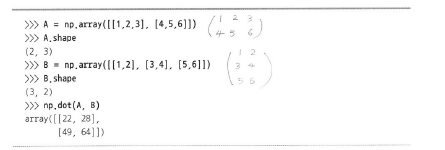

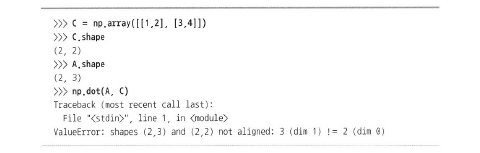

 - `np.dot(A,B)`는 `A@B`와 거의 비슷한 명령이다. 뭐가 정확히 다른지는 모르겠다.

### 3.3.3. 신경망에서 행렬 곱

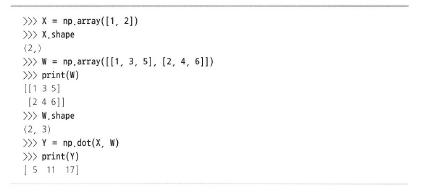

## 3.4. 3층 신경망 구현하기

### 3.4.1. 표기법 설명

이 장에서는 $y=Wx$와 같은 표현을 사용하지 않는다.
$y=xW$ 형식의 표현을 사용한다.
코드 상으로 두번째 형식이 더 구현하기 쉽기 때문인 것 같다.
따라서, weight parameter의 index도 조금 복잡하다.

첫번째 형식이라면,

$$\begin{bmatrix}y_1\\y_2\\w_3\end{bmatrix}
=\begin{bmatrix}w_{11}&w_{12}\\w_{21}&w_{22}\\w_{31}&w_{32}\end{bmatrix}
\begin{bmatrix}x_1\\x_2\end{bmatrix}$$

의 형태가 될 것이다.
즉, $w$의 첫번째 인덱스는 행을, 두번째 인덱스는 열을 가리키는 아주 널리 쓰이는 형태이다.

그런데 이 책에서는 두번째 형태를 선택하여 다음과 같이 쓰는데

$$\begin{bmatrix}y_1&y_2&w_3\end{bmatrix}
=\begin{bmatrix}x_1&x_2\end{bmatrix}
\begin{bmatrix}w_{11}&w_{21}&w_{31}\\w_{12}&w_{22}&w_{32}\end{bmatrix}$$

$w$의 첫번째 인덱스가 열을, 두번째 인덱스가 행을 가리키는 이상한 형태가 된다.

### 3.4.2. 각 층의 신호 전달 구현하기

여기 내용은 다 캡쳐해서 옮겨보았다.

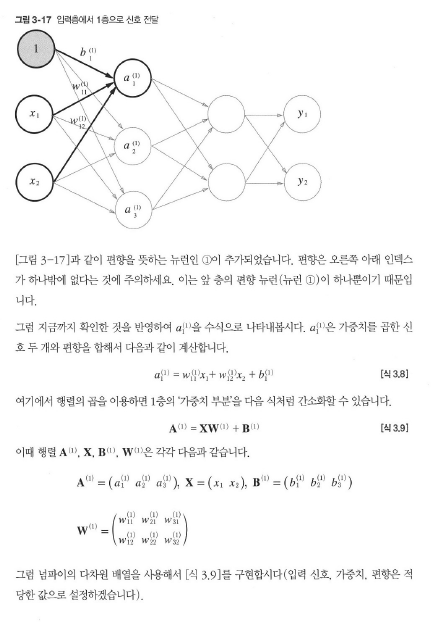

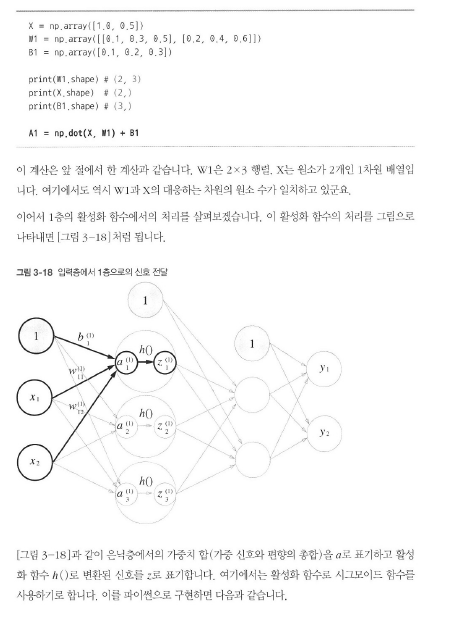

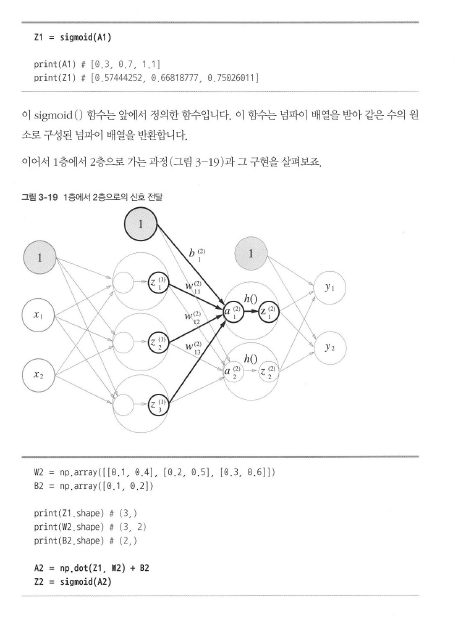

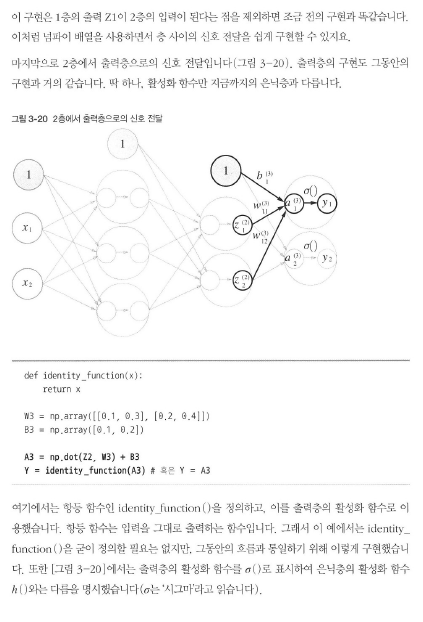

### 3.4.3. 구현 정리

In [12]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4],[0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3],[0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

In [13]:
def forward(network, x):
    W1, W2, W3 = network['W1'],network['W2'],network['W3']
    b1, b2, b3 = network['b1'],network['b2'],network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = a3 # 책에서는 identity_function을 따로 정의했지만 나는 그냥 출력하겠다.
    return y

In [14]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 3.5. 출력충 설계하기

 - 분류, classification
 - 회귀, regression - 19세기 후반 우생학자 프랜시스 골턴

### 3.5.1. 항등 함수와 소프트맥스 함수 구현하기

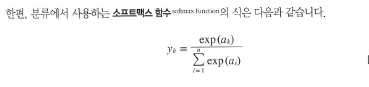

In [15]:
def softmax(a):
    exp_a = np.exp(a)
    return exp_a / np.sum(exp_a)

In [16]:
x = np.array([1,1])
y = np.array([1,2])
z = np.array([0,1])
print(softmax(x))
print(softmax(y))
print(softmax(z))

[0.5 0.5]
[0.26894142 0.73105858]
[0.26894142 0.73105858]


### 3.5.2. 소프트맥스 함수 구현 시 주의점

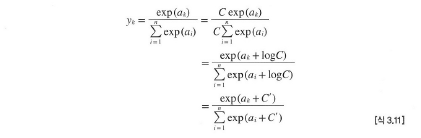

 - 오버플로 문제를 해결하기 위해 위와 같은 식을 이용한다.
 - 벡터의 각 성분에 같은 값을 더하거나 빼더라도 그 결과가 여전히 같다.

In [17]:
def softmax(a):
    exp_a = np.exp(a-np.max(a))
    return exp_a / np.sum(exp_a)

In [18]:
x = np.array([1,1])
y = np.array([1,2])
z = np.array([0,1])
print(softmax(x))
print(softmax(y))
print(softmax(z))

[0.5 0.5]
[0.26894142 0.73105858]
[0.26894142 0.73105858]


### 3.5.3. 소프트맥스 함수의 특징

- 출력값의 각 성분을 확률과 유사하게 생각할 수 있다.
- 이것을 classifcation 문제에 적용시킬 수 있다.
- 단조증가함수
- 출력 층에서는 softmax를 생략하는 것이 일반적이다.


<font color = blue> 잘 이해가 안가는 점이, softmax는 주로 출력층에만 달지 않나? </font>

### 3.5.4. 출력층의 뉴런 수 정하기

10개

## 3.6. 손글씨 숫자 인식

### 3.6.1. MNIST 데이터셋

In [19]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(
    flatten = True, normalize = False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


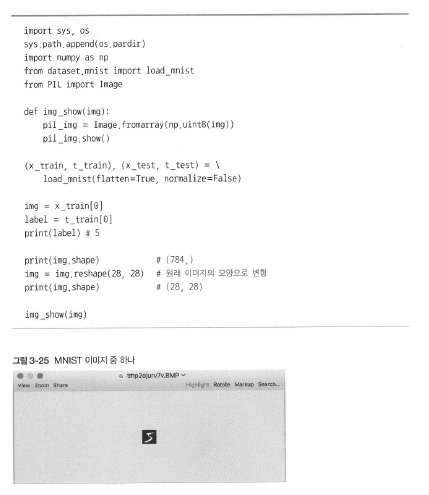

이 부분의 코드 구현은 생략했다.

### 3.6.2. 신경망의 추론 처리

In [20]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(
        normalize = True, flatten = True, one_hot_label = False)
    return x_test, t_test

In [21]:
def init_network():
    with open("sample_weight.pkl",'rb') as f:
        network = pickle.load(f)
    return network

`FileNotFoundError: [Errno 2] No such file or directory: 'sample_weight.pkl'`
와 같은 오류가 뜨고 있다.
따라서 이하 코드는 기록하지 않고 캡쳐만 하겠다.

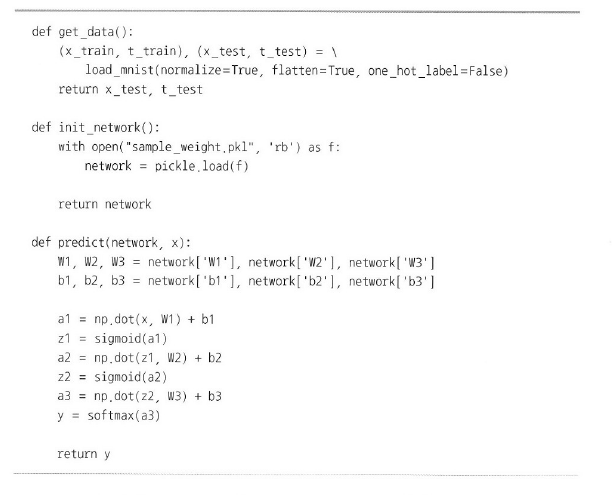

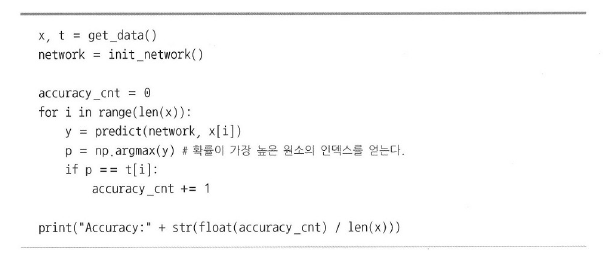

### 3.6.3. 배치 처리

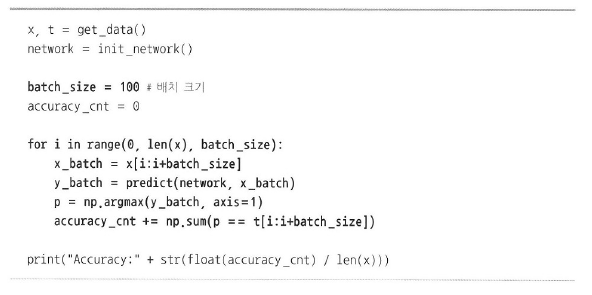

## 3.7. 정리